## Calling REST APIs with Python

##### By Bryan Cafferky Copyright 2022
##### For demonstration only.  Not intended for production use.

### Calling the Social Media REST API Talkwalker

#### See documentation at:
https://apidocs.talkwalker.com/#_talkwalker_search_api_overview_example

#### Set display on dataframe columns to not truncate

In [40]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

### Format and submit the Talkwalker search request...

##### Python request object documentation at:
https://docs.python-requests.org/en/latest/user/quickstart/

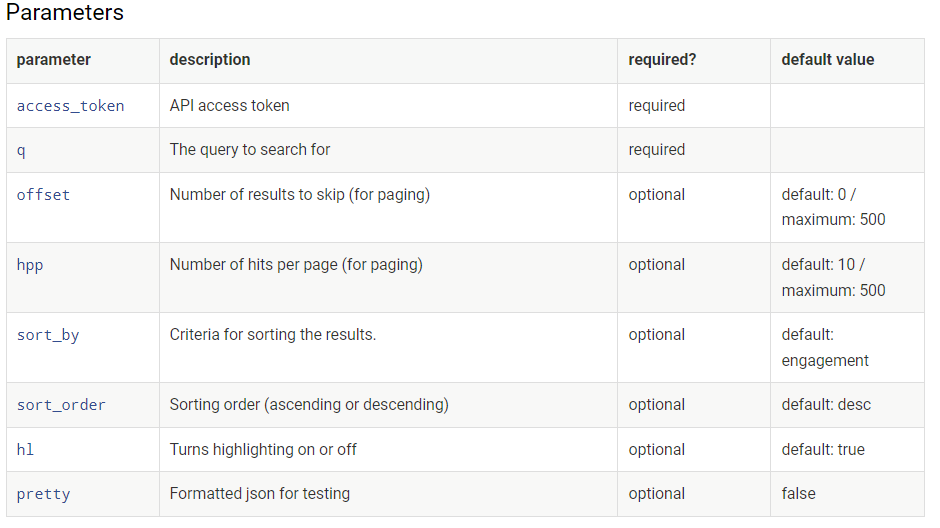

In [41]:
import requests

# Using authentication to make API calls   

### Usage of parameters defined in your API
call_params = (
    ('access_token', 'demo'),
    ('q', 'cats'),
    ('offset', '0'),
    ('limit', '20'),
)

tw_api_endpoint = 'https://api.talkwalker.com/api/v1/search/results'


# Making sample API call with authentication and API parameters data
response = requests.get(tw_api_endpoint, params=call_params, verify=True)
print(response)

<Response [200]>


### Everything comes back to the response object...

In [42]:
response.status_code == requests.codes.ok  # Check the response code

True

In [43]:
response.text[:500]  # See some of the returned content

'{"status_code":"0","status_message":"OK","request":"GET /api/v1/search/results?access_token=demo&q=cats&offset=0&limit=20","pagination":{"next":"GET /api/v1/search/results?access_token=demo&q=cats&offset=10&limit=20","total":655233},"result_content":{"data":[{"data":{"url":"http://www.reddit.com/r/cats/comments/excl1f/essential_oils_are_toxic_to_cats_i_didnt_know/","indexed":1651181413020,"search_indexed":1651181428828,"published":1580591041000,"title":"Essential oils are toxic to cats. I didn’t'

In [ ]:
response.json()

In [45]:
import json

dict_resp = response.json()

In [46]:
import pandas as pd
import json

# create a list of records
talkwalker_info_ls = []

row_count = len(dict_resp['result_content']['data'])
print('There are {} rows of data.'.format(row_count))

for row in range(row_count):
    row_dict = dict_resp['result_content']['data'][row]['data']
     
    row_info = {
        'published_id'      : row_dict['published'],
        'title'             : row_dict['title'],
        'content'           : row_dict['content'],
        'content_snippet'   : row_dict['content_snippet'],
        'root_url'          : row_dict['root_url'],
        'parent_url'        : row_dict['parent_url'],
        'lang'              : row_dict['lang'],
        'sentiment'         : row_dict['sentiment'],
        'source_type'       : ' '.join(row_dict['source_type']),
        'post_type'         : ' '.join(row_dict['post_type']),
        'word_count'        : row_dict['word_count'],        
        'trending_score'    : row_dict['trending_score'],  
        'reach'             : row_dict['reach'],  
        'tokens_title'      : ' '.join(row_dict['tokens_title']),
        'article_ext_attr'  : ' '.join(row_dict['article_extended_attributes']),
        'source_ext_attr'   : json.dumps(row_dict['trending_score']),  
        'extra_source_attr' : json.dumps(row_dict['extra_source_attributes']),  
        'engagement'        : row_dict['engagement']          
    }  
    
    talkwalker_info_ls.append(row_info)  
    
# create dataframe from the extracted records
talkwalker_df = pd.DataFrame(talkwalker_info_ls)

# Convert data for unsupported types error...
#talkwalker_df['source_type'] = talkwalker_df['source_type'].astype('str')
#talkwalker_df['post_type'] = talkwalker_df['post_type'].astype('str')

# display the dataframe
talkwalker_df.head(1) 

There are 10 rows of data.


,published_id,title,content,content_snippet,root_url,parent_url,lang,sentiment,source_type,post_type,word_count,trending_score,reach,tokens_title,article_ext_attr,source_ext_attr,extra_source_attr,engagement
0,1580591041000,Essential oils are toxic to cats. I didn’t know this and got a diffuser for my apartment. This was the result - I came home to my kitten being limp and barely breathing. Big thanks to Terra Nova vet’s Dr. chaudry who saved my baby’s life. DO NOT USE ESSENTIAL OILS IN YOUR HOME IF YOU HAVE CATS!!!!,https://i.redd.it/v5899z54nde41.jpg,https://i.redd.it/v5899z54nde41.jpg,http://www.reddit.com/r/cats,http://www.reddit.com/r/cats/comments/excl1f/essential_oils_are_toxic_to_cats_i_didnt_know/,en,5,MESSAGEBOARD MESSAGEBOARD_OTHER,LINK,1,0,459583328,USE ESSENTIAL OILS USE ESSENTIAL OILS and barely breathing Terra Nova vet ESSENTIAL OILS ESSENTIAL OILS ESSENTIAL OILS USE ESSENTIAL USE ESSENTIAL HAVE CATS,facebook_shares facebook_likes num_comments,0,"{""world_data"": {""continent"": ""North America"", ""country"": ""United States"", ""region"": ""Washington, D.C."", ""city"": ""Washington, D.C."", ""longitude"": -77.0086669921875, ""latitude"": 38.89984130859375, ""country_code"": ""us"", ""resolution"": ""COUNTRY""}, ""id"": ""re:t5_2qhta"", ""name"": ""cats"", ""url"": ""http://www.reddit.com/r/cats""}",410199


In [47]:
talkwalker_df.info()  # View dataframe attributes...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   published_id       10 non-null     int64 
 1   title              10 non-null     object
 2   content            10 non-null     object
 3   content_snippet    10 non-null     object
 4   root_url           10 non-null     object
 5   parent_url         10 non-null     object
 6   lang               10 non-null     object
 7   sentiment          10 non-null     int64 
 8   source_type        10 non-null     object
 9   post_type          10 non-null     object
 10  word_count         10 non-null     int64 
 11  trending_score     10 non-null     int64 
 12  reach              10 non-null     int64 
 13  tokens_title       10 non-null     object
 14  article_ext_attr   10 non-null     object
 15  source_ext_attr    10 non-null     object
 16  extra_source_attr  10 non-null     object
 17  

### Let's store the response data into a SQLite table...

In [48]:
#  import sqlite libraries
import sqlite3

print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.37.0


In [49]:
conn = sqlite3.connect('socialmedia.db') # create or open database file

#### Create and load our data to a staging table...

In [50]:
talkwalker_df.to_sql('staging_talkwalker_data', conn, if_exists='replace', index = False)

In [51]:
print('ok')

ok


In [52]:
pd.read_sql_query("select * from staging_talkwalker_data limit 2", conn)

,published_id,title,content,content_snippet,root_url,parent_url,lang,sentiment,source_type,post_type,word_count,trending_score,reach,tokens_title,article_ext_attr,source_ext_attr,extra_source_attr,engagement
0,1580591041000,Essential oils are toxic to cats. I didn’t know this and got a diffuser for my apartment. This was the result - I came home to my kitten being limp and barely breathing. Big thanks to Terra Nova vet’s Dr. chaudry who saved my baby’s life. DO NOT USE ESSENTIAL OILS IN YOUR HOME IF YOU HAVE CATS!!!!,https://i.redd.it/v5899z54nde41.jpg,https://i.redd.it/v5899z54nde41.jpg,http://www.reddit.com/r/cats,http://www.reddit.com/r/cats/comments/excl1f/essential_oils_are_toxic_to_cats_i_didnt_know/,en,5,MESSAGEBOARD MESSAGEBOARD_OTHER,LINK,1,0,459583328,USE ESSENTIAL OILS USE ESSENTIAL OILS and barely breathing Terra Nova vet ESSENTIAL OILS ESSENTIAL OILS ESSENTIAL OILS USE ESSENTIAL USE ESSENTIAL HAVE CATS,facebook_shares facebook_likes num_comments,0,"{""world_data"": {""continent"": ""North America"", ""country"": ""United States"", ""region"": ""Washington, D.C."", ""city"": ""Washington, D.C."", ""longitude"": -77.0086669921875, ""latitude"": 38.89984130859375, ""country_code"": ""us"", ""resolution"": ""COUNTRY""}, ""id"": ""re:t5_2qhta"", ""name"": ""cats"", ""url"": ""http://www.reddit.com/r/cats""}",410199
1,1650633360000,"Maryland passes animal protection laws, one banning cat declawing","Maryland passes animal protection laws, one banning cat declawing\n\nUpdated: 9:16 AM EDT Apr 22, 2022\n\nHINSON WITH TWO OF THE BILLS THAT WILL PROTECT CATS AND DOGS. ASHLEY: ONE OF THE LAWS MAKES IT ILLEGAL TO DECLAW CATS ...",...THAT WILL PROTECT <b>CATS</b> AND DOGS. ASHLEY: ONE OF THE LAWS MAKES IT ILLEGAL TO DECLAW <b>CATS</b> IN MARYLAND. ETH OTHER GIVES DOG... Two of the bills will protect <b>cats</b> and dogs.One of the laws now makes it illegal to declaw <b>cats</b> in Maryland. Another gives...,https://www.wbaltv.com/,https://www.wbaltv.com/article/maryland-passes-animal-protection-laws-banning-cat-declawing/39795791,en,0,ONLINENEWS ONLINENEWS_OTHER,TEXT,1004,0,245000,passes animal protection animal protection laws Maryland passes animal Maryland passes animal protection protection laws cat declawing passes animal one banning Maryland,facebook_shares facebook_likes twitter_shares num_comments,0,"{""world_data"": {""continent"": ""North America"", ""country"": ""United States"", ""region"": ""Washington, D.C."", ""city"": ""Washington, D.C."", ""longitude"": -77.0086669921875, ""latitude"": 38.89984130859375, ""country_code"": ""us"", ""resolution"": ""COUNTRY""}, ""id"": ""ex:www.wbaltv.com"", ""name"": ""www.wbaltv.com""}",98741


#### Create our permanent talkwalker table (drop it if it already exists)

In [53]:
conn.execute('DROP TABLE IF EXISTS talkwalker_data');

conn.execute('''
CREATE TABLE talkwalker_data (
    published_id           INTEGER PRIMARY KEY NOT NULL,
    title                  TEXT,
    content                TEXT,
    content_snippet        TEXT,
    root_url               TEXT,
    parent_url             TEXT,
    lang                   TEXT,
    source_type            TEXT,
    post_type              TEXT,
    word_count             TEXT,
    trending_score         TEXT,
    reach                  TEXT,
    tokens_title           TEXT,
    article_ext_attr       TEXT,
    source_ext_attr        TEXT,
    extra_source_attr      TEXT,
    engagement             TEXT,           
    ETLLastUpdate DATETIME DEFAULT current_timestamp 
);
''')

#### Check the master table schema...

In [54]:
pd.read_sql_query("PRAGMA table_info(talkwalker_data)", conn)  # check the table schema

,cid,name,type,notnull,dflt_value,pk
0,0,published_id,INTEGER,1,None,1
1,1,title,TEXT,0,None,0
2,2,content,TEXT,0,None,0
3,3,content_snippet,TEXT,0,None,0
4,4,root_url,TEXT,0,None,0
5,5,parent_url,TEXT,0,None,0
6,6,lang,TEXT,0,None,0
7,7,source_type,TEXT,0,None,0
8,8,post_type,TEXT,0,None,0
9,9,word_count,TEXT,0,None,0


In [55]:
conn.commit()

#### Upsert, i.e. merge, the staging table into the master table...

In [56]:
sql = '''
INSERT INTO talkwalker_data(
 published_id         ,
 title                ,
 content              ,
 content_snippet      ,
 root_url             ,
 parent_url           ,
 lang                 ,
 source_type          ,
 post_type            ,
 word_count           ,
 trending_score       ,
 reach                ,
 tokens_title         ,
 article_ext_attr     ,
 source_ext_attr      ,
 extra_source_attr    ,
 engagement           
)
  SELECT 
     published_id         ,
     title                ,
     content              ,
     content_snippet      ,
     root_url             ,
     parent_url           ,
     lang                 ,
     source_type          ,
     post_type            ,
     word_count           ,
     trending_score       ,
     reach                ,
     tokens_title         ,
     article_ext_attr     ,
     source_ext_attr      ,
     extra_source_attr    ,
     engagement        
  FROM staging_talkwalker_data  
  WHERE true 
  ON CONFLICT(published_id) 
  DO UPDATE SET 
     title             = excluded.title               ,        
     content           = excluded.content             ,
     content_snippet   = excluded.content_snippet     ,
     root_url          = excluded.root_url            ,
     parent_url        = excluded.parent_url          ,
     lang              = excluded.lang                ,
     source_type       = excluded.source_type         ,
     post_type         = excluded.post_type           ,
     word_count        = excluded.word_count          ,
     trending_score    = excluded.trending_score      ,
     reach             = excluded.reach               ,
     tokens_title      = excluded.tokens_title        ,
     article_ext_attr  = excluded.article_ext_attr    ,
     source_ext_attr   = excluded.source_ext_attr     ,
     extra_source_attr = excluded.extra_source_attr   ,
     engagement        = excluded.engagement          ,
     ETLLastUpdate     = current_timestamp
'''

conn.execute(sql)

#### Verify the data got loaded...

In [57]:
pd.read_sql_query("select * from talkwalker_data limit 2", conn)

,published_id,title,content,content_snippet,root_url,parent_url,lang,source_type,post_type,word_count,trending_score,reach,tokens_title,article_ext_attr,source_ext_attr,extra_source_attr,engagement,ETLLastUpdate
0,1580591041000,Essential oils are toxic to cats. I didn’t know this and got a diffuser for my apartment. This was the result - I came home to my kitten being limp and barely breathing. Big thanks to Terra Nova vet’s Dr. chaudry who saved my baby’s life. DO NOT USE ESSENTIAL OILS IN YOUR HOME IF YOU HAVE CATS!!!!,https://i.redd.it/v5899z54nde41.jpg,https://i.redd.it/v5899z54nde41.jpg,http://www.reddit.com/r/cats,http://www.reddit.com/r/cats/comments/excl1f/essential_oils_are_toxic_to_cats_i_didnt_know/,en,MESSAGEBOARD MESSAGEBOARD_OTHER,LINK,1,0,459583328,USE ESSENTIAL OILS USE ESSENTIAL OILS and barely breathing Terra Nova vet ESSENTIAL OILS ESSENTIAL OILS ESSENTIAL OILS USE ESSENTIAL USE ESSENTIAL HAVE CATS,facebook_shares facebook_likes num_comments,0,"{""world_data"": {""continent"": ""North America"", ""country"": ""United States"", ""region"": ""Washington, D.C."", ""city"": ""Washington, D.C."", ""longitude"": -77.0086669921875, ""latitude"": 38.89984130859375, ""country_code"": ""us"", ""resolution"": ""COUNTRY""}, ""id"": ""re:t5_2qhta"", ""name"": ""cats"", ""url"": ""http://www.reddit.com/r/cats""}",410199,2022-05-15 17:43:29
1,1650013860000,Liger vs Tigon,"Liger vs Tigon are both hybrid big cats. Tigons are produced when a male tiger breeds with a female lion. Ligers are the offspring of a male lion bred with a female tiger. Although they both result from a tiger and lion crossbreed, their specific parentage is what differentiates ligers from tigons.",Liger vs Tigon are both hybrid big <b>cats</b>. Tigons are produced when a male tiger breeds with a female lion. Ligers are the offspring of a male lion bred with a female tiger. Although they both result from...,http://www.forumku.com/,https://www.forumku.com/first-thing-first-pelajaran-pertama/100476-liger-vs-tigon.html,en,MESSAGEBOARD MESSAGEBOARD_OTHER,TEXT,52,0,47058,Tigon Tigon Liger Liger,facebook_shares facebook_likes num_comments,0,"{""world_data"": {""continent"": ""North America"", ""country"": ""United States"", ""region"": ""Washington, D.C."", ""city"": ""Washington, D.C."", ""longitude"": -77.0086669921875, ""latitude"": 38.89984130859375, ""country_code"": ""us"", ""resolution"": ""COUNTRY""}, ""id"": ""ex:www.forumku.com"", ""name"": ""www.forumku.com""}",44239,2022-05-15 17:43:29


### Close the database and database connection...

In [58]:
conn.close()